In [137]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

---
# Part 1

### Load the Networks

In [86]:
G1 = nx.read_edgelist('./yeast.txt', nodetype=int,data=(('weight',float),))
G2 = nx.read_edgelist('./US_airports.txt', nodetype=int,data=(('weight',float),))

#g1 = nx.read_weighted_edgelist('./yeast.txt')
#g2 = nx.read_weighted_edgelist('./US_airports.txt')

print('G1 (yeast)')
print(G1.number_of_nodes(), G1.number_of_edges(), G1.is_directed(), np.round(nx.density(G1), 4))
print('density:', np.round(np.mean([e[1] for e in nx.clustering(G1).items()]), 4))
print(list(G1.edges(data=True))[0:3])

print('\nG2 (airports)')
print(G2.number_of_nodes(), G2.number_of_edges(), G2.is_directed(), np.round(nx.density(G2), 4))
print('density:', np.round(np.mean([e[1] for e in nx.clustering(G2).items()]), 4))
print(list(G2.edges(data=True))[0:3])

G1 (yeast)
688 1078 False 0.0046
density: 0.0472
[(1, 194, {'weight': 1.0}), (1, 199, {'weight': 1.0}), (194, 77, {'weight': 1.0})]

G2 (airports)
1574 17215 False 0.0139
density: 0.5042
[(1, 47, {'weight': 9.0}), (1, 832, {'weight': 7.0}), (47, 6, {'weight': 9.0})]


---
### Top 10 nodes for each centrality metric

#### Function

In [216]:
def top_10_centrality(g):
    metrics = ['eigenvector','katz','pagerank','closeness','harmonic','shortestpathsbetween']
    res = {}

    res['eigenvector'] = [i[0] for i in sorted(nx.centrality.eigenvector_centrality(g).items(), key=lambda x: x[1])[-10:]]
    res['katz'] = [i[0] for i in sorted(nx.centrality.katz_centrality_numpy(g).items(), key=lambda x: x[1])[-10:]]
    res['pagerank'] = [i[0] for i in sorted(nx.pagerank(g).items(), key=lambda x: x[1])[-10:]]
    res['closeness'] = [i[0] for i in sorted(nx.centrality.closeness_centrality(g).items(), key=lambda x: x[1])[-10:]]
    res['harmonic'] = [i[0] for i in sorted(nx.centrality.harmonic_centrality(g).items(), key=lambda x: x[1])[-10:]]
    res['shortestpathsbetween'] = [i[0] for i in sorted(nx.centrality.betweenness_centrality(g).items(), key=lambda x: x[1])[-10:]]
    
    print('Top 10 nodes by centrality metric')
    for m in metrics:
        print(m.ljust(20), '\t', res[m])

#### G1 (yeast)

In [217]:
top_10_centrality(G1)

Top 10 nodes by centrality metric
eigenvector          	 [271, 143, 364, 100, 654, 64, 549, 590, 578, 556]
katz                 	 [271, 143, 364, 100, 654, 64, 590, 549, 578, 556]
pagerank             	 [361, 360, 684, 371, 617, 625, 578, 332, 209, 556]
closeness            	 [578, 456, 209, 64, 57, 556, 355, 197, 609, 617]
harmonic             	 [561, 64, 57, 578, 197, 355, 209, 609, 617, 556]
shortestpathsbetween 	 [119, 371, 684, 332, 355, 625, 609, 556, 209, 617]


#### G2 (airports)

In [218]:
top_10_centrality(G2)

Top 10 nodes by centrality metric
eigenvector          	 [206, 500, 711, 1252, 391, 1068, 709, 435, 114, 1200]
katz                 	 [1611, 1462, 731, 344, 435, 246, 1374, 452, 1411, 875]
pagerank             	 [1437, 711, 88, 766, 1433, 391, 389, 877, 1200, 114]
closeness            	 [711, 500, 1200, 982, 766, 709, 389, 1068, 877, 114]
harmonic             	 [982, 711, 500, 389, 1200, 766, 1068, 709, 877, 114]
shortestpathsbetween 	 [1068, 114, 389, 685, 1433, 1016, 766, 877, 505, 88]


---
### Jacard Similarity Heatmap

#### Functions

In [201]:
def jaccard_sim(a, b):
    intersect = [i for i in a if i in b]
    union     = list(set(a + b))
    return len(intersect) / len(union)

def top_10_jaccard_summary(g):
    
    metrics = ['eigenvector','katz','pagerank','closeness','harmonic','shortestpathsbetween']
    res = {}

    res['eigenvector'] = [i[0] for i in sorted(nx.centrality.eigenvector_centrality(g).items(), key=lambda x: x[1])[-10:]]
    res['katz'] = [i[0] for i in sorted(nx.centrality.katz_centrality_numpy(g).items(), key=lambda x: x[1])[-10:]]
    res['pagerank'] = [i[0] for i in sorted(nx.pagerank(g).items(), key=lambda x: x[1])[-10:]]
    res['closeness'] = [i[0] for i in sorted(nx.centrality.closeness_centrality(g).items(), key=lambda x: x[1])[-10:]]
    res['harmonic'] = [i[0] for i in sorted(nx.centrality.harmonic_centrality(g).items(), key=lambda x: x[1])[-10:]]
    res['shortestpathsbetween'] = [i[0] for i in sorted(nx.centrality.betweenness_centrality(g).items(), key=lambda x: x[1])[-10:]]
    
    print('Top 10 nodes')
    for m in metrics:
        print(m, res[m])
    
    results  = []
    computed = []
    
    for m in metrics:
        for mm in metrics:
            js = (m, mm, jaccard_sim(res[m],res[mm]))
            results.append(js)
            
    js = pd.DataFrame.from_records(results, columns=['metric_1','metric_2','jaccard'])
    js = js.pivot(index='metric_1', columns='metric_2', values='jaccard') ## pivot
    
    return js.loc[metrics,metrics]

#### G1 (yeast)

<AxesSubplot:xlabel='metric_2', ylabel='metric_1'>

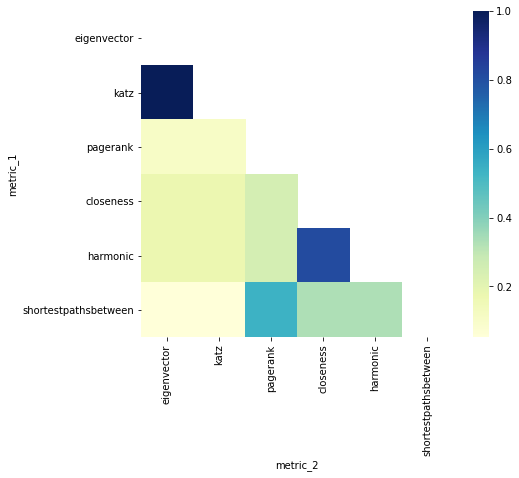

In [199]:
js = top_10_jaccard_summary(G1)

plt.figure(figsize=(7,6))
sns.heatmap(js, cmap="YlGnBu", mask=np.triu(np.ones_like(js)))

#### G2 (airports)

<AxesSubplot:xlabel='metric_2', ylabel='metric_1'>

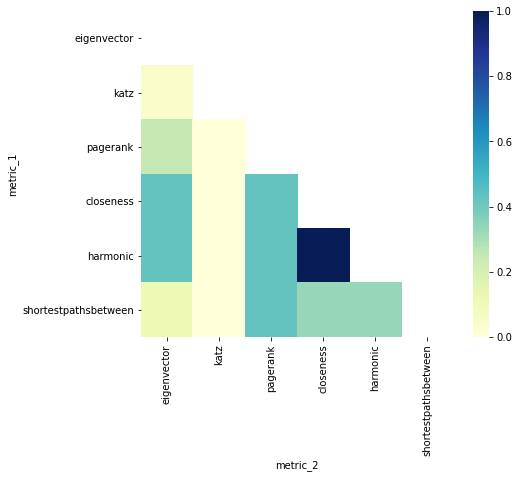

In [200]:
js = top_10_jaccard_summary(G2)

plt.figure(figsize=(7,6))
sns.heatmap(js, cmap="YlGnBu", mask=np.triu(np.ones_like(js)))

# END
---